In [1]:
#Importing libraries, visualization tools, machine learning models and metrics
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [2]:
#Acquire and describe the data
dataframe = pd.read_csv('creditcard.csv')

In [3]:
print(dataframe.columns.values)
dataframe.head()

['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataframe.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#Checking for columns with null entries
df=pd.DataFrame(len(dataframe)-dataframe.count())
print(df)

        0
Time    0
V1      0
V2      0
V3      0
V4      0
V5      0
V6      0
V7      0
V8      0
V9      0
V10     0
V11     0
V12     0
V13     0
V14     0
V15     0
V16     0
V17     0
V18     0
V19     0
V20     0
V21     0
V22     0
V23     0
V24     0
V25     0
V26     0
V27     0
V28     0
Amount  0
Class   0


Class
0    284315
1       492
Name: V1, dtype: int64


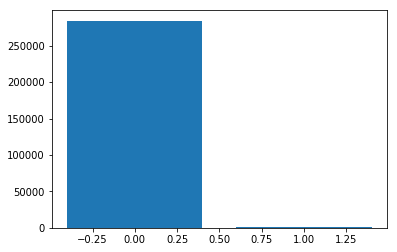

In [6]:
#Visualizing the data points according to number fraudulent and non-fraudulent transactions
a=dataframe.groupby('Class').V1.count()
print(a)
plt.bar(range(0,2),a)
plt.show()

From the visualized plot, it is evident that the number of fraudulent transactions is approximately 0.2% of the total number of transactions. This clearly indicates that our dataset is highly imbalanced.

In [7]:
#Splitting the data into 70% train and 30% test data and creating inputs for our classification model
X = dataframe.loc[:,dataframe.columns != 'Class']
Y = dataframe.loc[:,dataframe.columns == 'Class']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(199364, 30) (199364, 1)
(85443, 30) (85443, 1)


In [8]:
#Applying Logistic Regression to imbalanced data 
log=LogisticRegression()
log.fit(X_train,Y_train)
Y_pred = log.predict(X_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
confusion_matrix(Y_test,Y_pred)

array([[85285,    11],
       [   70,    77]], dtype=int64)

In [10]:
accuracy_score(Y_test,Y_pred)

0.9990519995786665

In [11]:
recall_score(Y_test,Y_pred)

0.5238095238095238

The recall obtained on applying our model to the imbalaced data is very low. To obtain a high recall score, we need to use techniques such as undersampling or SMOTE so that we can have comparable number of fraudulent and non-fraudulent transactions, which will fetch us better results.

In [12]:
non_fraud_indices=dataframe[dataframe.Class==0].index
fraud_indices=dataframe[dataframe.Class==1].index

In [13]:
#Random undersampling of non-fraudulent transactions
random_indices_nf=np.random.choice(non_fraud_indices,492,replace=False)
under_sample_indices=np.concatenate([fraud_indices,random_indices_nf])

Class
0    492
1    492
Name: V1, dtype: int64


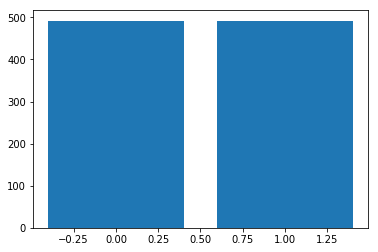

In [14]:
under_sample=dataframe.loc[under_sample_indices]
a=under_sample.groupby('Class').V1.count()
print(a)
plt.bar(range(0,2),a)
plt.show()

In [15]:
#Applying Logistic Regression to undersampled data
X_under = under_sample.loc[:,under_sample.columns != 'Class']
Y_under = under_sample.loc[:,under_sample.columns == 'Class']
X_under_train, X_under_test, Y_under_train, Y_under_test = train_test_split(X_under,Y_under,test_size = 0.3, random_state = 0)
print(X_under_train.shape, Y_under_train.shape)
print(X_under_test.shape, Y_under_test.shape)

(688, 30) (688, 1)
(296, 30) (296, 1)


In [16]:
lr_under = LogisticRegression()
lr_under.fit(X_under_train,Y_under_train)
Y_under_pred = lr_under.predict(X_under_test)


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
confusion_matrix(Y_under_test,Y_under_pred)

array([[139,  10],
       [ 10, 137]], dtype=int64)

In [18]:
accuracy_score(Y_under_test,Y_under_pred)

0.9324324324324325

In [19]:
recall_score(Y_under_test,Y_under_pred)

0.9319727891156463

The recall score obtained after undersampling of data has improved significantly.

In [20]:
!pip install imblearn

In [21]:
from imblearn.over_sampling import SMOTE 

In [22]:
#Using SMOTE for oversampling of fraudulent data
smt=SMOTE()
X_smote, Y_smote = smt.fit_sample(X, Y)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
np.bincount(Y_smote)

array([284315, 284315], dtype=int64)

In [24]:
#Applying Logistic Regression to synthetic data created using SMOTE
X_smote_train, X_smote_test, Y_smote_train, Y_smote_test = train_test_split(X_smote,Y_smote,test_size = 0.3, random_state = 0)
print(X_smote_train.shape, Y_smote_train.shape)
print(X_smote_test.shape, Y_smote_test.shape)

(398041, 30) (398041,)
(170589, 30) (170589,)


In [25]:
lr_smote = LogisticRegression()
lr_smote.fit(X_smote_train,Y_smote_train)
Y_smote_pred = lr_smote.predict(X_smote_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
confusion_matrix(Y_smote_test,Y_smote_pred)

array([[83682,  1490],
       [ 4109, 81308]], dtype=int64)

In [27]:
accuracy_score(Y_smote_test,Y_smote_pred)

0.9671784229932763

In [28]:
recall_score(Y_smote_test,Y_smote_pred)

0.9518948218738659

The recall score obtained after the application of SMOTE is even greater than that obtained after undersampling. This suggests that undersampling and SMOTE can be used in combination to obtain even higher recall scores while dealing with imbalanced datasets.